In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
X, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=100)

In [3]:
X

array([[-2.145618  ,  6.51701984],
       [-6.52829754,  2.25478502],
       [-8.05937649,  2.75037965],
       ...,
       [ 5.71286727,  7.79330305],
       [ 0.99834729, -3.48325143],
       [-0.73620719,  7.88373149]])

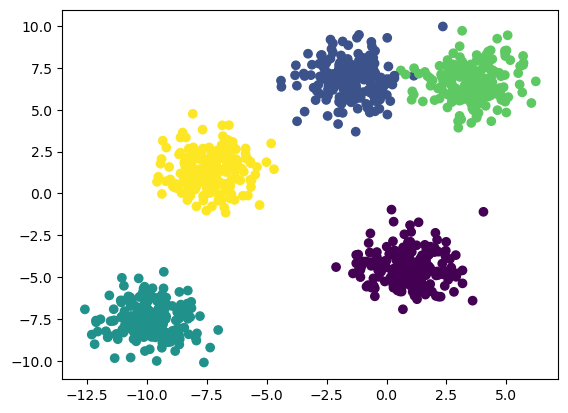

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = _)

# Initialize the center points (clusters)

In [5]:
k = 5
color = ['green','red','blue', 'cyan', 'yellow']

clusters = {}

for i in range(k):
    
    center = np.random.randint(-12, 10, size = (2))
    point = []
    
    cluster = {
        'center':center,
        'point':point,
        'color':color[i]
    }
    clusters[i] = cluster

In [6]:
clusters

{0: {'center': array([-9,  1]), 'point': [], 'color': 'green'},
 1: {'center': array([ 1, -2]), 'point': [], 'color': 'red'},
 2: {'center': array([2, 1]), 'point': [], 'color': 'blue'},
 3: {'center': array([  5, -11]), 'point': [], 'color': 'cyan'},
 4: {'center': array([-4,  7]), 'point': [], 'color': 'yellow'}}

In [7]:
def distance_formula(p1, p2):
    dist = ((p1[0]-p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return dist

In [8]:
print(distance_formula(clusters[0]['center'], X[0]))

8.798867001442936


In [9]:
# E - step

def point_to_cluster(clusters):
    
    for i in range(X.shape[0]):
        
        distance = []
    
        for j in range(k):

            dist = distance_formula(X[i], clusters[j]['center'])
            distance.append(dist)
        
        belong_cluster = np.argmin(distance)
        
        clusters[belong_cluster]['point'].append(X[i])

In [10]:
# M - step

def update_cluster(clusters):
    
    for i in range(k):
        
        p = np.array(clusters[i]['point'])
        
        if p.shape[0] > 0:
            
            u = p.mean(axis = 0)
            
            clusters[i]['center'] = u
            
            clusters[i]['point'] = []
        

In [11]:
def plot_cluster(clusters):
    
    for i in range(k):
        p = np.array(clusters[i]['point'])
        
        if p.shape[0] > 0:
            
            plt.scatter(p[:, 0], p[:, 1], c = color[i])
        else:
            pass
        
        cluster_center = clusters[i]['center']
        
        plt.scatter(cluster_center[0], cluster_center[1], c = 'black')

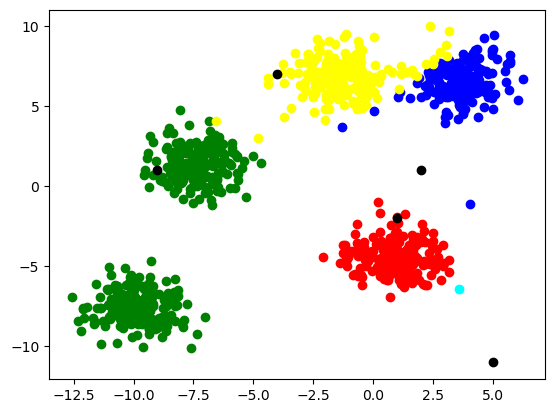

In [12]:
point_to_cluster(clusters)
plot_cluster(clusters)
update_cluster(clusters)

# run the below cell untill the convergence reached 

In [13]:
for i in range(100):
    point_to_cluster(clusters)
#     plot_cluster(clusters)
    update_cluster(clusters)

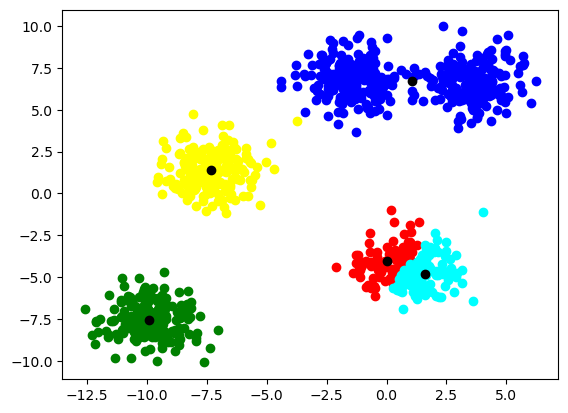

In [14]:
point_to_cluster(clusters)
plot_cluster(clusters)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state = 423)
kmeans.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=423)

In [16]:
center = kmeans.cluster_centers_

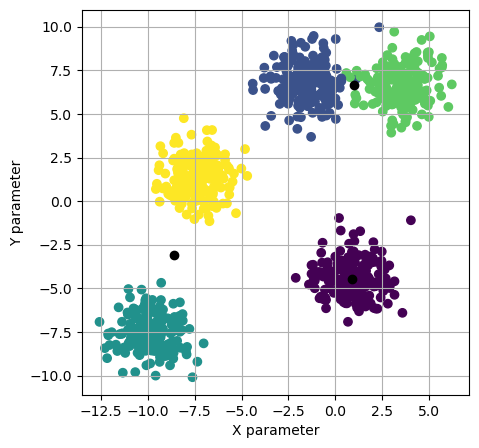

In [17]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(center[:,0],center[: ,1], c = 'black' )
plt.xlabel('X parameter')
plt.ylabel('Y parameter')
plt.grid(True)
plt.show()

In [18]:
kmeans.predict([[1.12341, -12.1234213]])

array([0])

In [19]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400,n_init = 10, random_state=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[60801.50802891254,
 25617.9369175755,
 13357.92535806544,
 4674.5462779066875,
 2079.2040005314293,
 1922.9425515511502,
 1787.9236075816607,
 1619.1348669202418,
 1495.485485206302,
 1379.4139093489098]

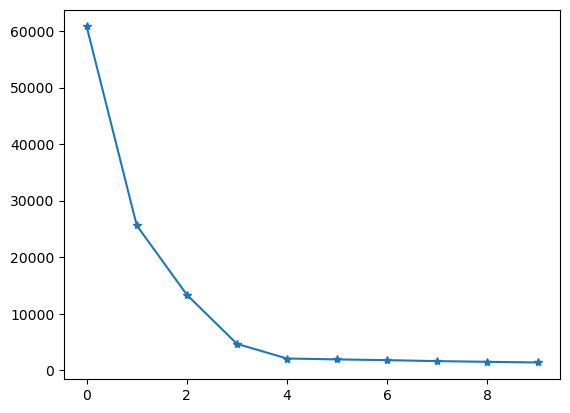

In [21]:
plt.plot(wcss, marker = '*')

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 423)
kmeans.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=423)

In [23]:
center = kmeans.cluster_centers_

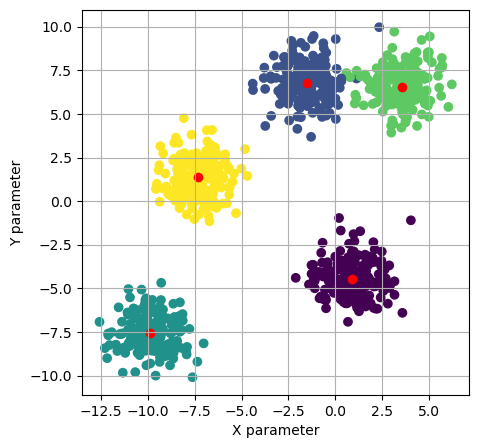

In [24]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(center[:,0],center[: ,1], c = 'red' )
plt.xlabel('X parameter')
plt.ylabel('Y parameter')
plt.grid(True)
plt.show()

In [25]:
kmeans.predict([[1.12341, -12.1234213]])

array([0])

# K-means clustering using Sklearn 

In [26]:
from sklearn.cluster import KMeans

In [27]:
cls = KMeans(n_clusters=7, max_iter=400)

In [28]:
cls.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=400, n_clusters=7)

In [29]:
X[0]

array([-2.145618  ,  6.51701984])

In [30]:
center = cls.cluster_centers_

In [31]:
center.shape

(7, 2)

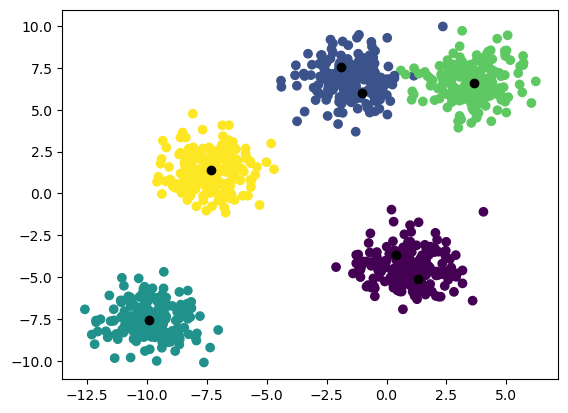

In [32]:
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(center[:, 0], center[:, 1], c = 'black')

# Now apply Elbow method 

In [33]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400,n_init = 10, random_state=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [34]:
wcss

[60801.50802891254,
 25617.9369175755,
 13357.92535806544,
 4674.5462779066875,
 2079.2040005314293,
 1922.9425515511502,
 1787.9236075816607,
 1619.1348669202418,
 1495.485485206302,
 1379.4139093489098]

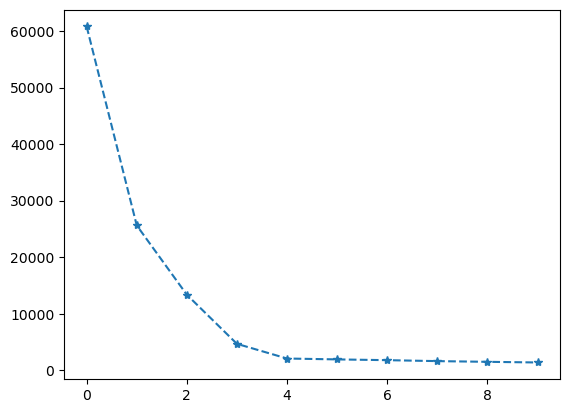

In [35]:
plt.plot(wcss, marker = "*", linestyle = '--')

In [36]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [37]:
center = cluster.cluster_centers_

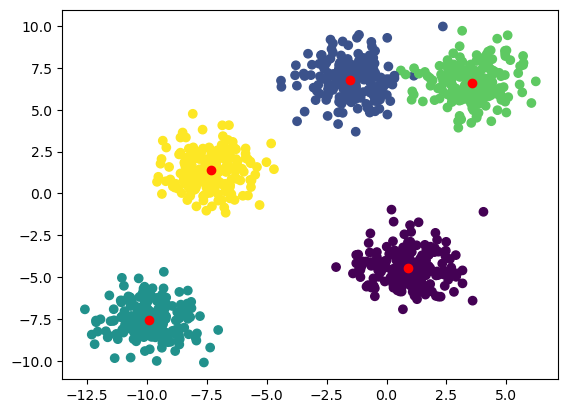

In [38]:
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(center[:, 0], center[:, 1], c = 'red')

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris = load_iris()

In [41]:
x = pd.DataFrame(iris.data,columns = iris.feature_names)
y = iris.target

In [42]:
x.shape

(150, 4)

In [43]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


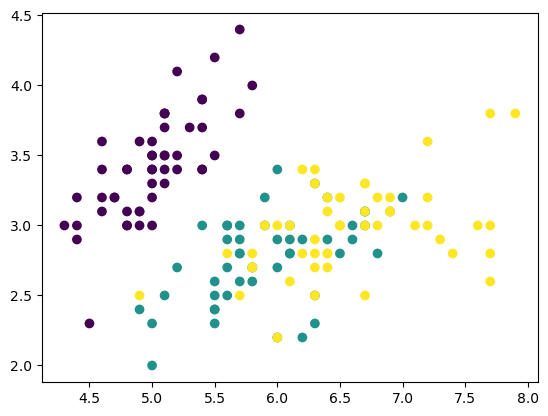

In [44]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y)

In [45]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400,n_init = 10
                   )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

In [46]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.255523809523815,
 46.46465384615385,
 39.03998724608726,
 34.5141051948052,
 30.136360617452727,
 27.894012189564826,
 26.254004698009854]

In [47]:
C = kmeans.cluster_centers_

In [48]:
C.shape

(10, 4)

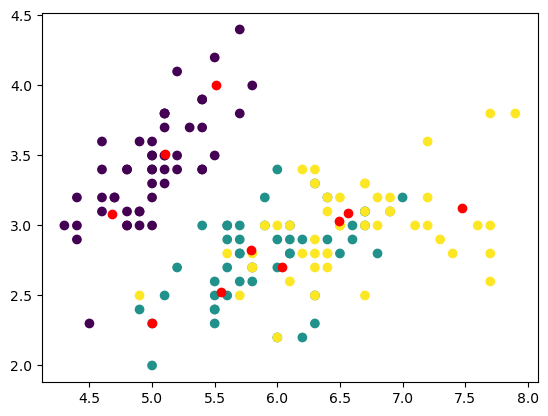

In [49]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y)
plt.scatter(C[:, 0], C[:, 1], c = 'red')

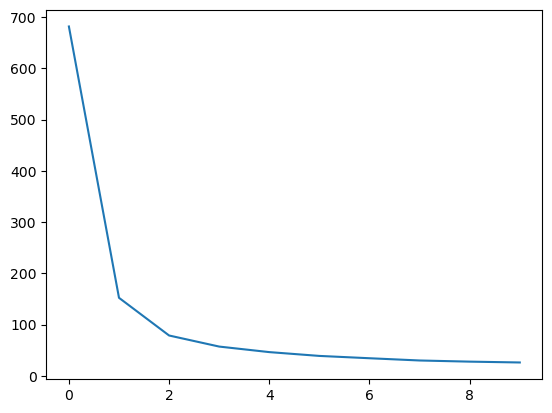

In [50]:
plt.plot(wcss)

In [51]:
cls = KMeans(n_clusters=3)

In [52]:
cls.fit(x)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
C = cls.cluster_centers_

In [54]:
C.shape

(3, 4)

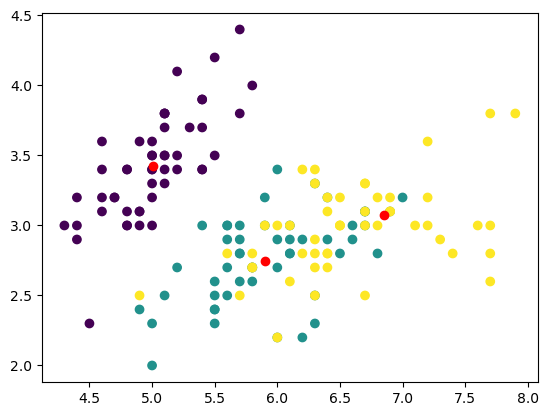

In [55]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y)
plt.scatter(C[:, 0], C[:, 1], c = 'red')

In [56]:
A = (cls.predict([[1.2, 1.92, -1.342, -0.9]]))[0]
A

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

In [57]:
iris.target_names[1]

'versicolor'